In [1]:
import random as rd
import warnings

import cv2
import geomstats.backend as gs
import matplotlib.pyplot as plt
from geomstats.geometry.discrete_curves import R2, DiscreteCurves
from geomstats.geometry.pre_shape import PreShapeSpace
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.geometric_median import GeometricMedian
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

from src.utils import (
    extract_all_types,
    generate_ds_from_folders,
    get_img_contour,
    interpolate,
    load_train_test,
    normalize_contour,
    plot_original_and_contour,
    preprocess_train_test,
)
from src.visualisation import (
    plot_curve,
    plot_overlayed_geodesics,
    plot_sample_with_info,
    plots_geodesics,
)

M_AMBIENT = 2
k_sampling_points = 500
PRESHAPE_SPACE = PreShapeSpace(m_ambient=M_AMBIENT, k_landmarks=k_sampling_points)
PRESHAPE_METRIC = PRESHAPE_SPACE.embedding_space.metric

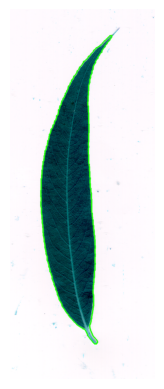

In [227]:
lt = 7
path1 = f"./data/extracts/leaf{lt}/train/l{lt}nr001.tif"
img1 = cv2.imread(path1)
longest_contour1 = get_img_contour(img1)
curve1 = normalize_contour(longest_contour1)
plot_original_and_contour(img1, longest_contour1)

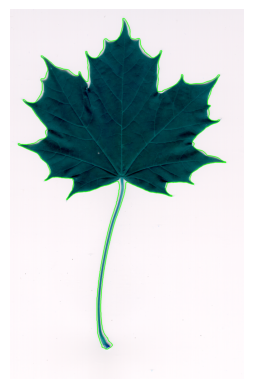

In [231]:
lt = 2
path1 = f"./data/extracts/leaf{lt}/train/l{lt}nr001.tif"
img1 = cv2.imread(path1)
longest_contour1 = get_img_contour(img1)
curve1 = normalize_contour(longest_contour1)
plot_original_and_contour(img1, longest_contour1)

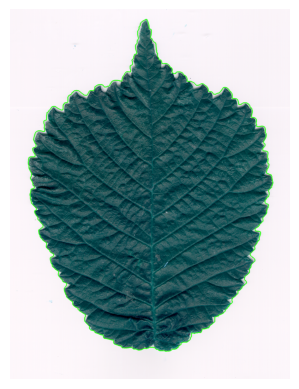

In [229]:
lt = 9
path1 = f"./data/extracts/leaf{lt}/train/l{lt}nr001.tif"
img1 = cv2.imread(path1)
longest_contour1 = get_img_contour(img1)
curve1 = normalize_contour(longest_contour1)
plot_original_and_contour(img1, longest_contour1)

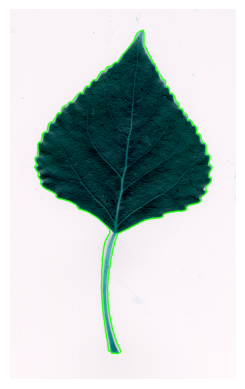

In [230]:
lt = 13
path1 = f"./data/extracts/leaf{lt}/train/l{lt}nr001.tif"
img1 = cv2.imread(path1)
longest_contour1 = get_img_contour(img1)
curve1 = normalize_contour(longest_contour1)
plot_original_and_contour(img1, longest_contour1)

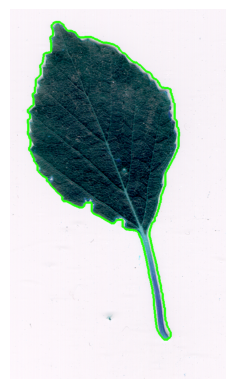

In [216]:
path1 = "./data/examples/l5nr002.tif"
img1 = cv2.imread(path1)
longest_contour1 = get_img_contour(img1)
curve1 = normalize_contour(longest_contour1)
plot_original_and_contour(img1, longest_contour1)

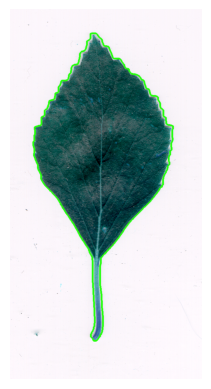

In [4]:
path2 = "./data/examples/l5nr005.tif"
img2 = cv2.imread(path2)
longest_contour2 = get_img_contour(img2)
curve2 = normalize_contour(longest_contour2)
plot_original_and_contour(img2, longest_contour2)

In [5]:
warnings.filterwarnings("ignore")


rd.seed(42)
gs.random.seed(2021)

INFO: Using numpy backend


In [9]:
n_train = 50
n_test = 20

extract_all_types(n_train, n_test, n_types=16)

100%|██████████| 15/15 [00:26<00:00,  1.80s/it]

Extracted files from zip


In [ ]:
train_ds, test_ds = generate_ds_from_folders(save=True)

In [8]:
train_ds, test_ds = load_train_test("data/raw")

Loaded train and test datasets


In [31]:
rd.shuffle(train_ds)

In [33]:
train_ds, test_ds = preprocess_train_test(train_ds, test_ds, save=True)

Interpolate...
Remove duplicates...
Align...
Interpolate...
Remove duplicates...
Align...
Saved train and test datasets


In [9]:
train_ds_p, test_ds_p = load_train_test(folder="data/processed")

Loaded train and test datasets


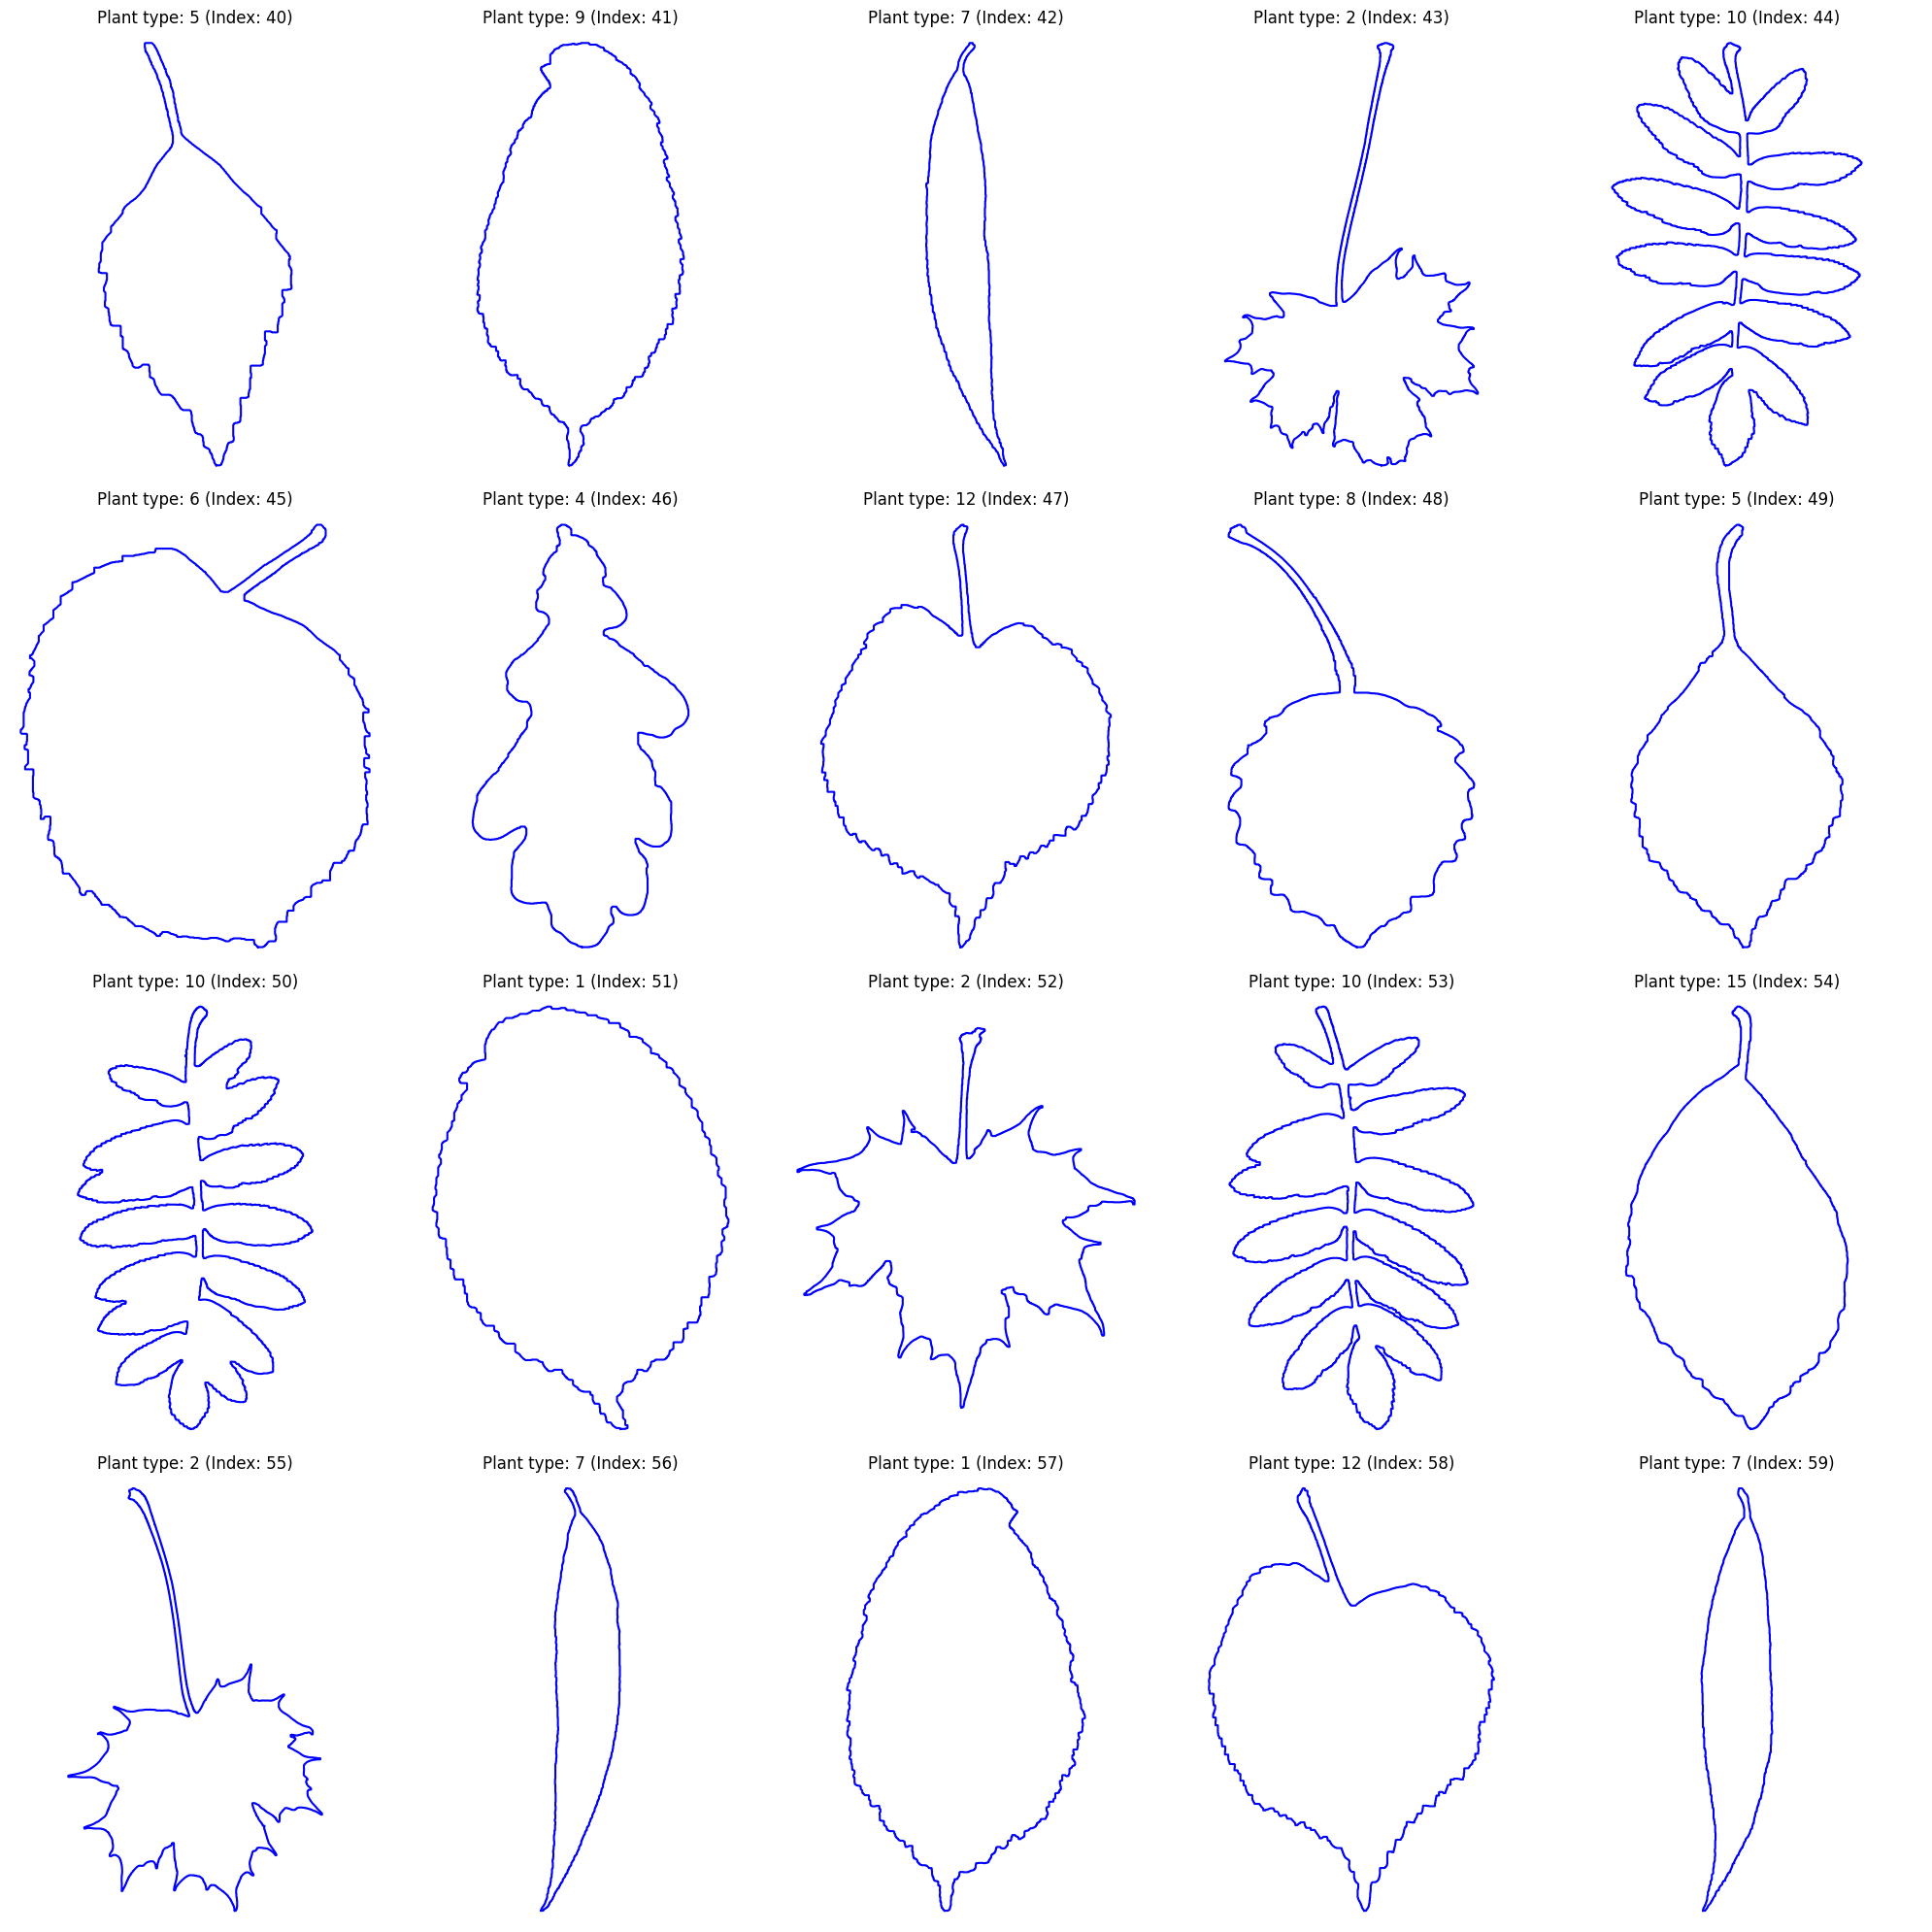

In [14]:
fig = plot_sample_with_info(
    train_ds, indexes=list(range(40, 60)), n_rows=4, n_cols=5, figsize=(20, 20)
)

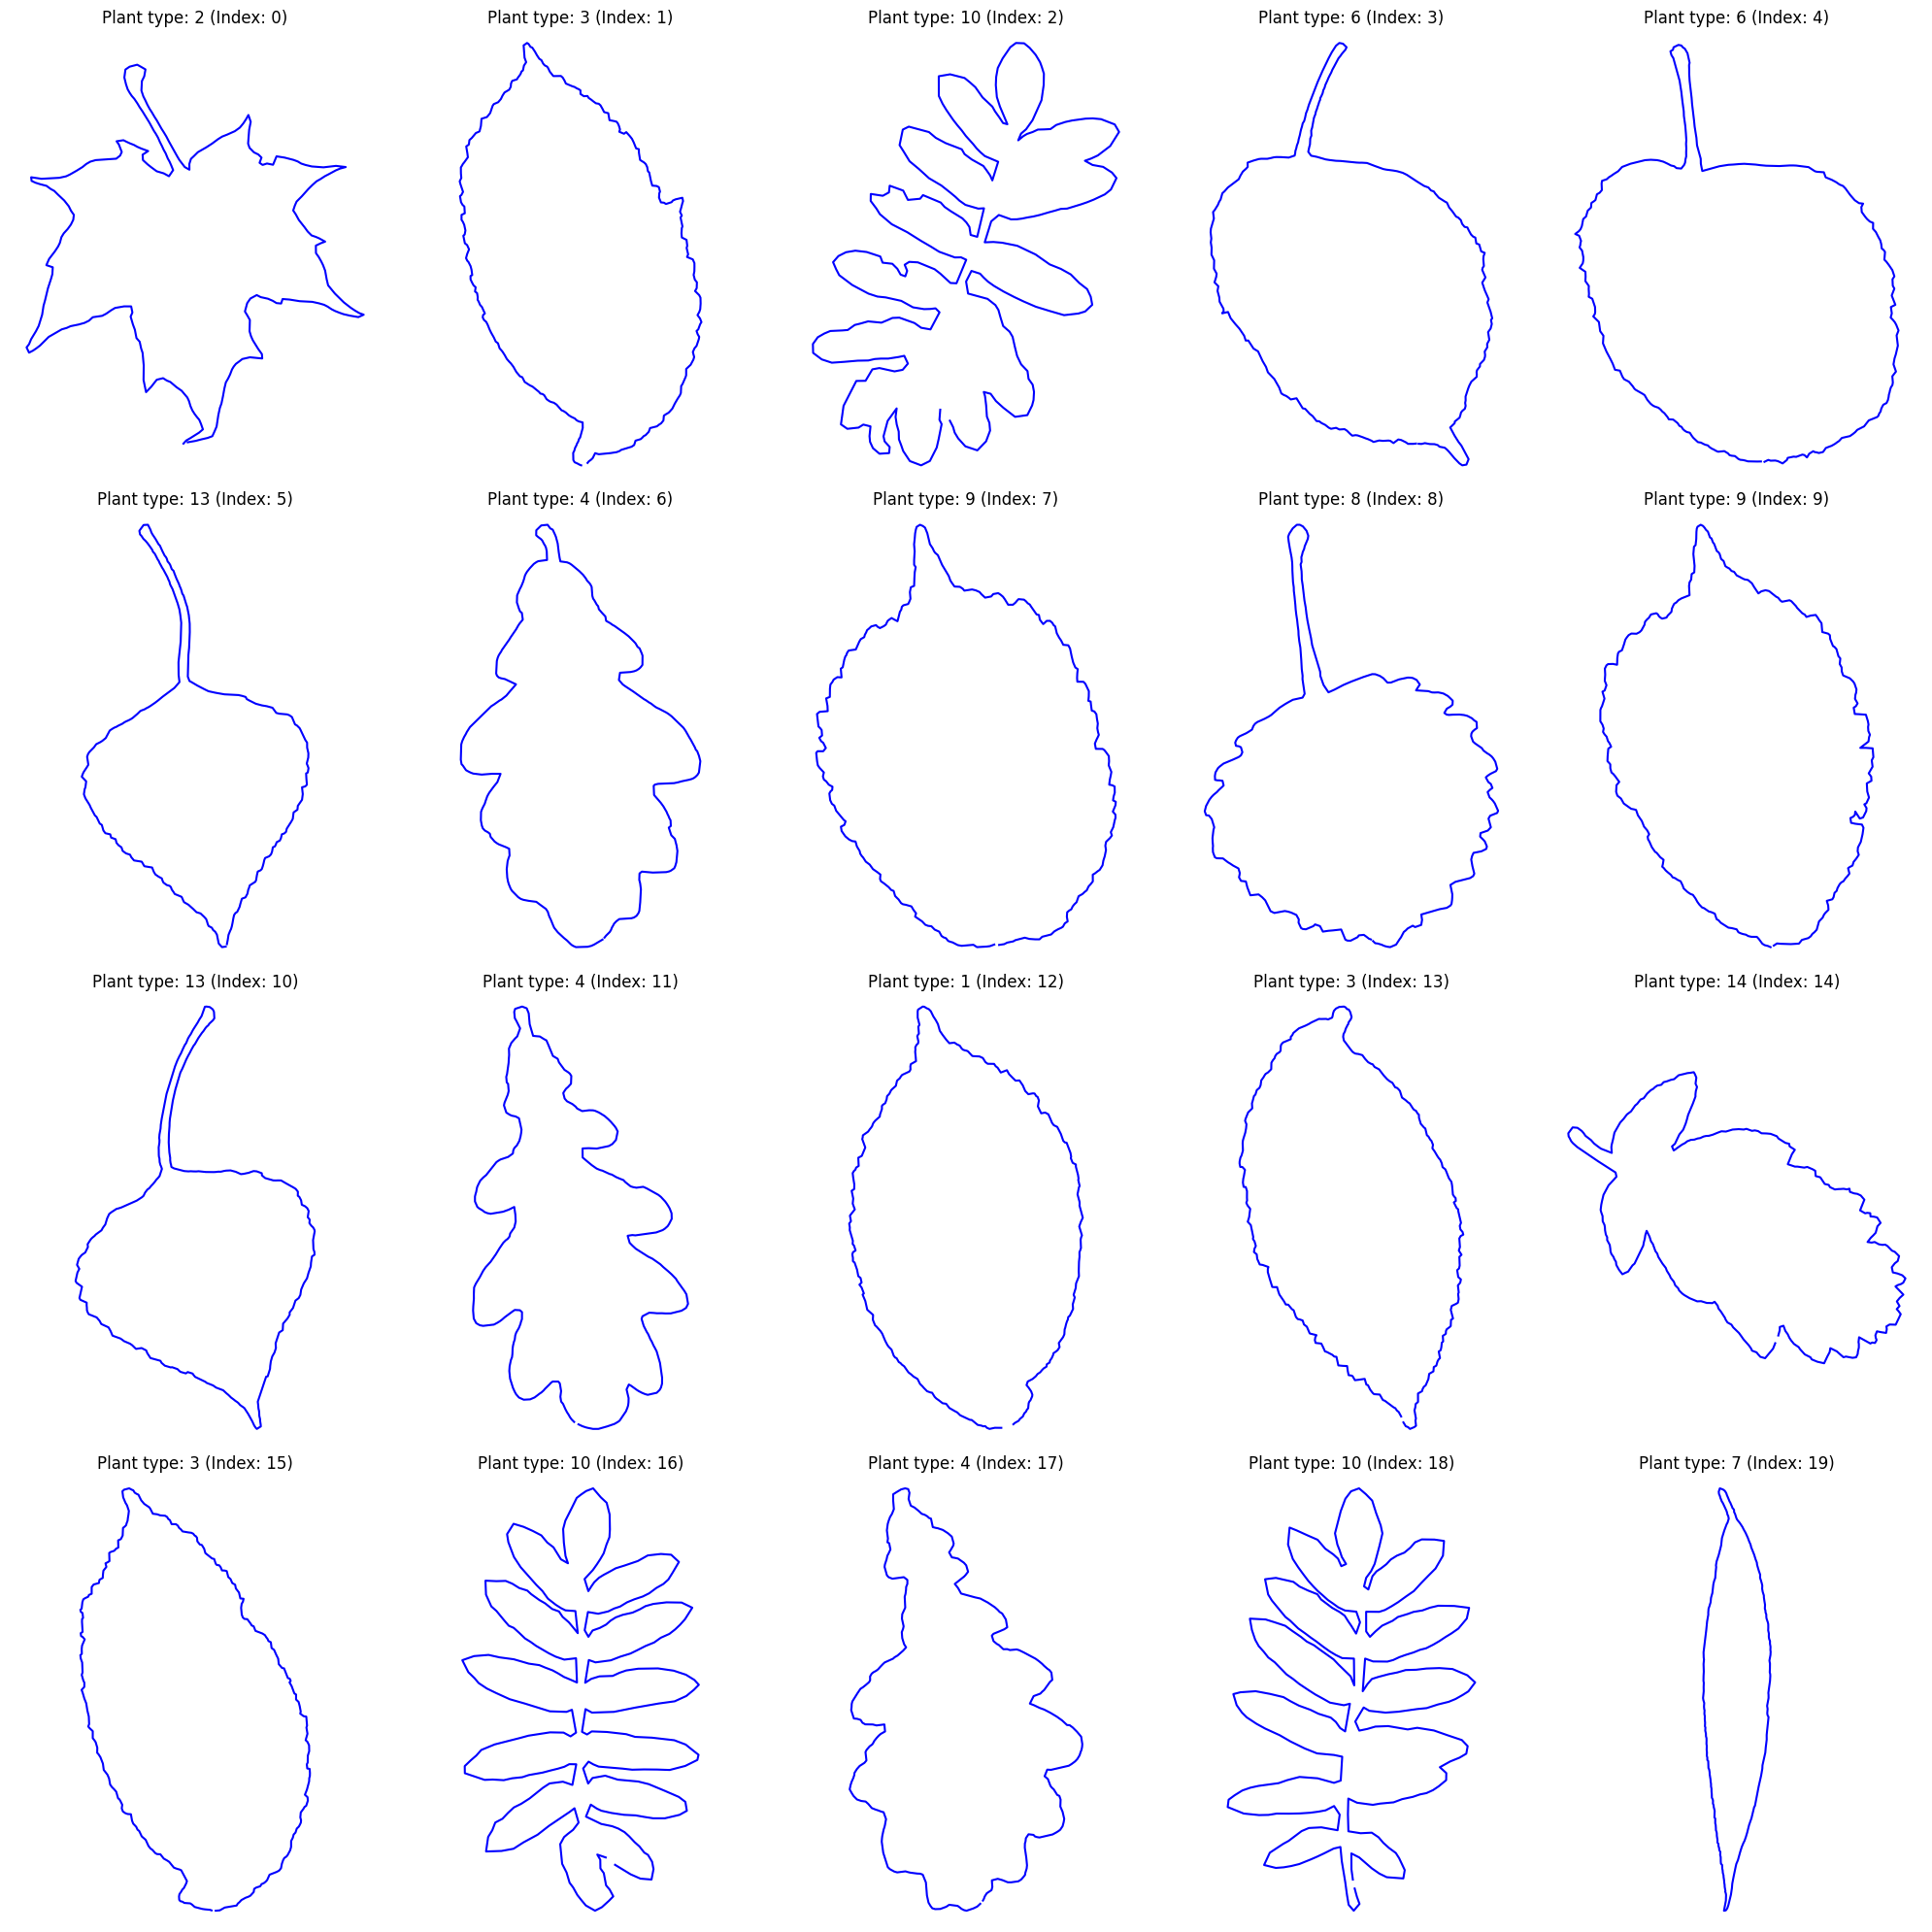

In [15]:
fig = plot_sample_with_info(
    train_ds_p, indexes=list(range(20)), n_rows=4, n_cols=5, figsize=(20, 20)
)

In [48]:
subset = []
types = [2, 7, 9, 13]

for leaf in train_ds_p:
    if leaf["type"] in types:
        subset.append(leaf)

In [165]:
clean_subset = [
    # 6, 31, 38, 45, 72,
    1,
    4,
    14,
    23,
    26,
    2,
    3,
    7,
    13,
    24,
    5,
    9,
    12,
    21,
    27,
]

In [171]:
test_subset = [
    80,
    82,
    # 81, 87,
    84,
    91,
    86,
    89,
]

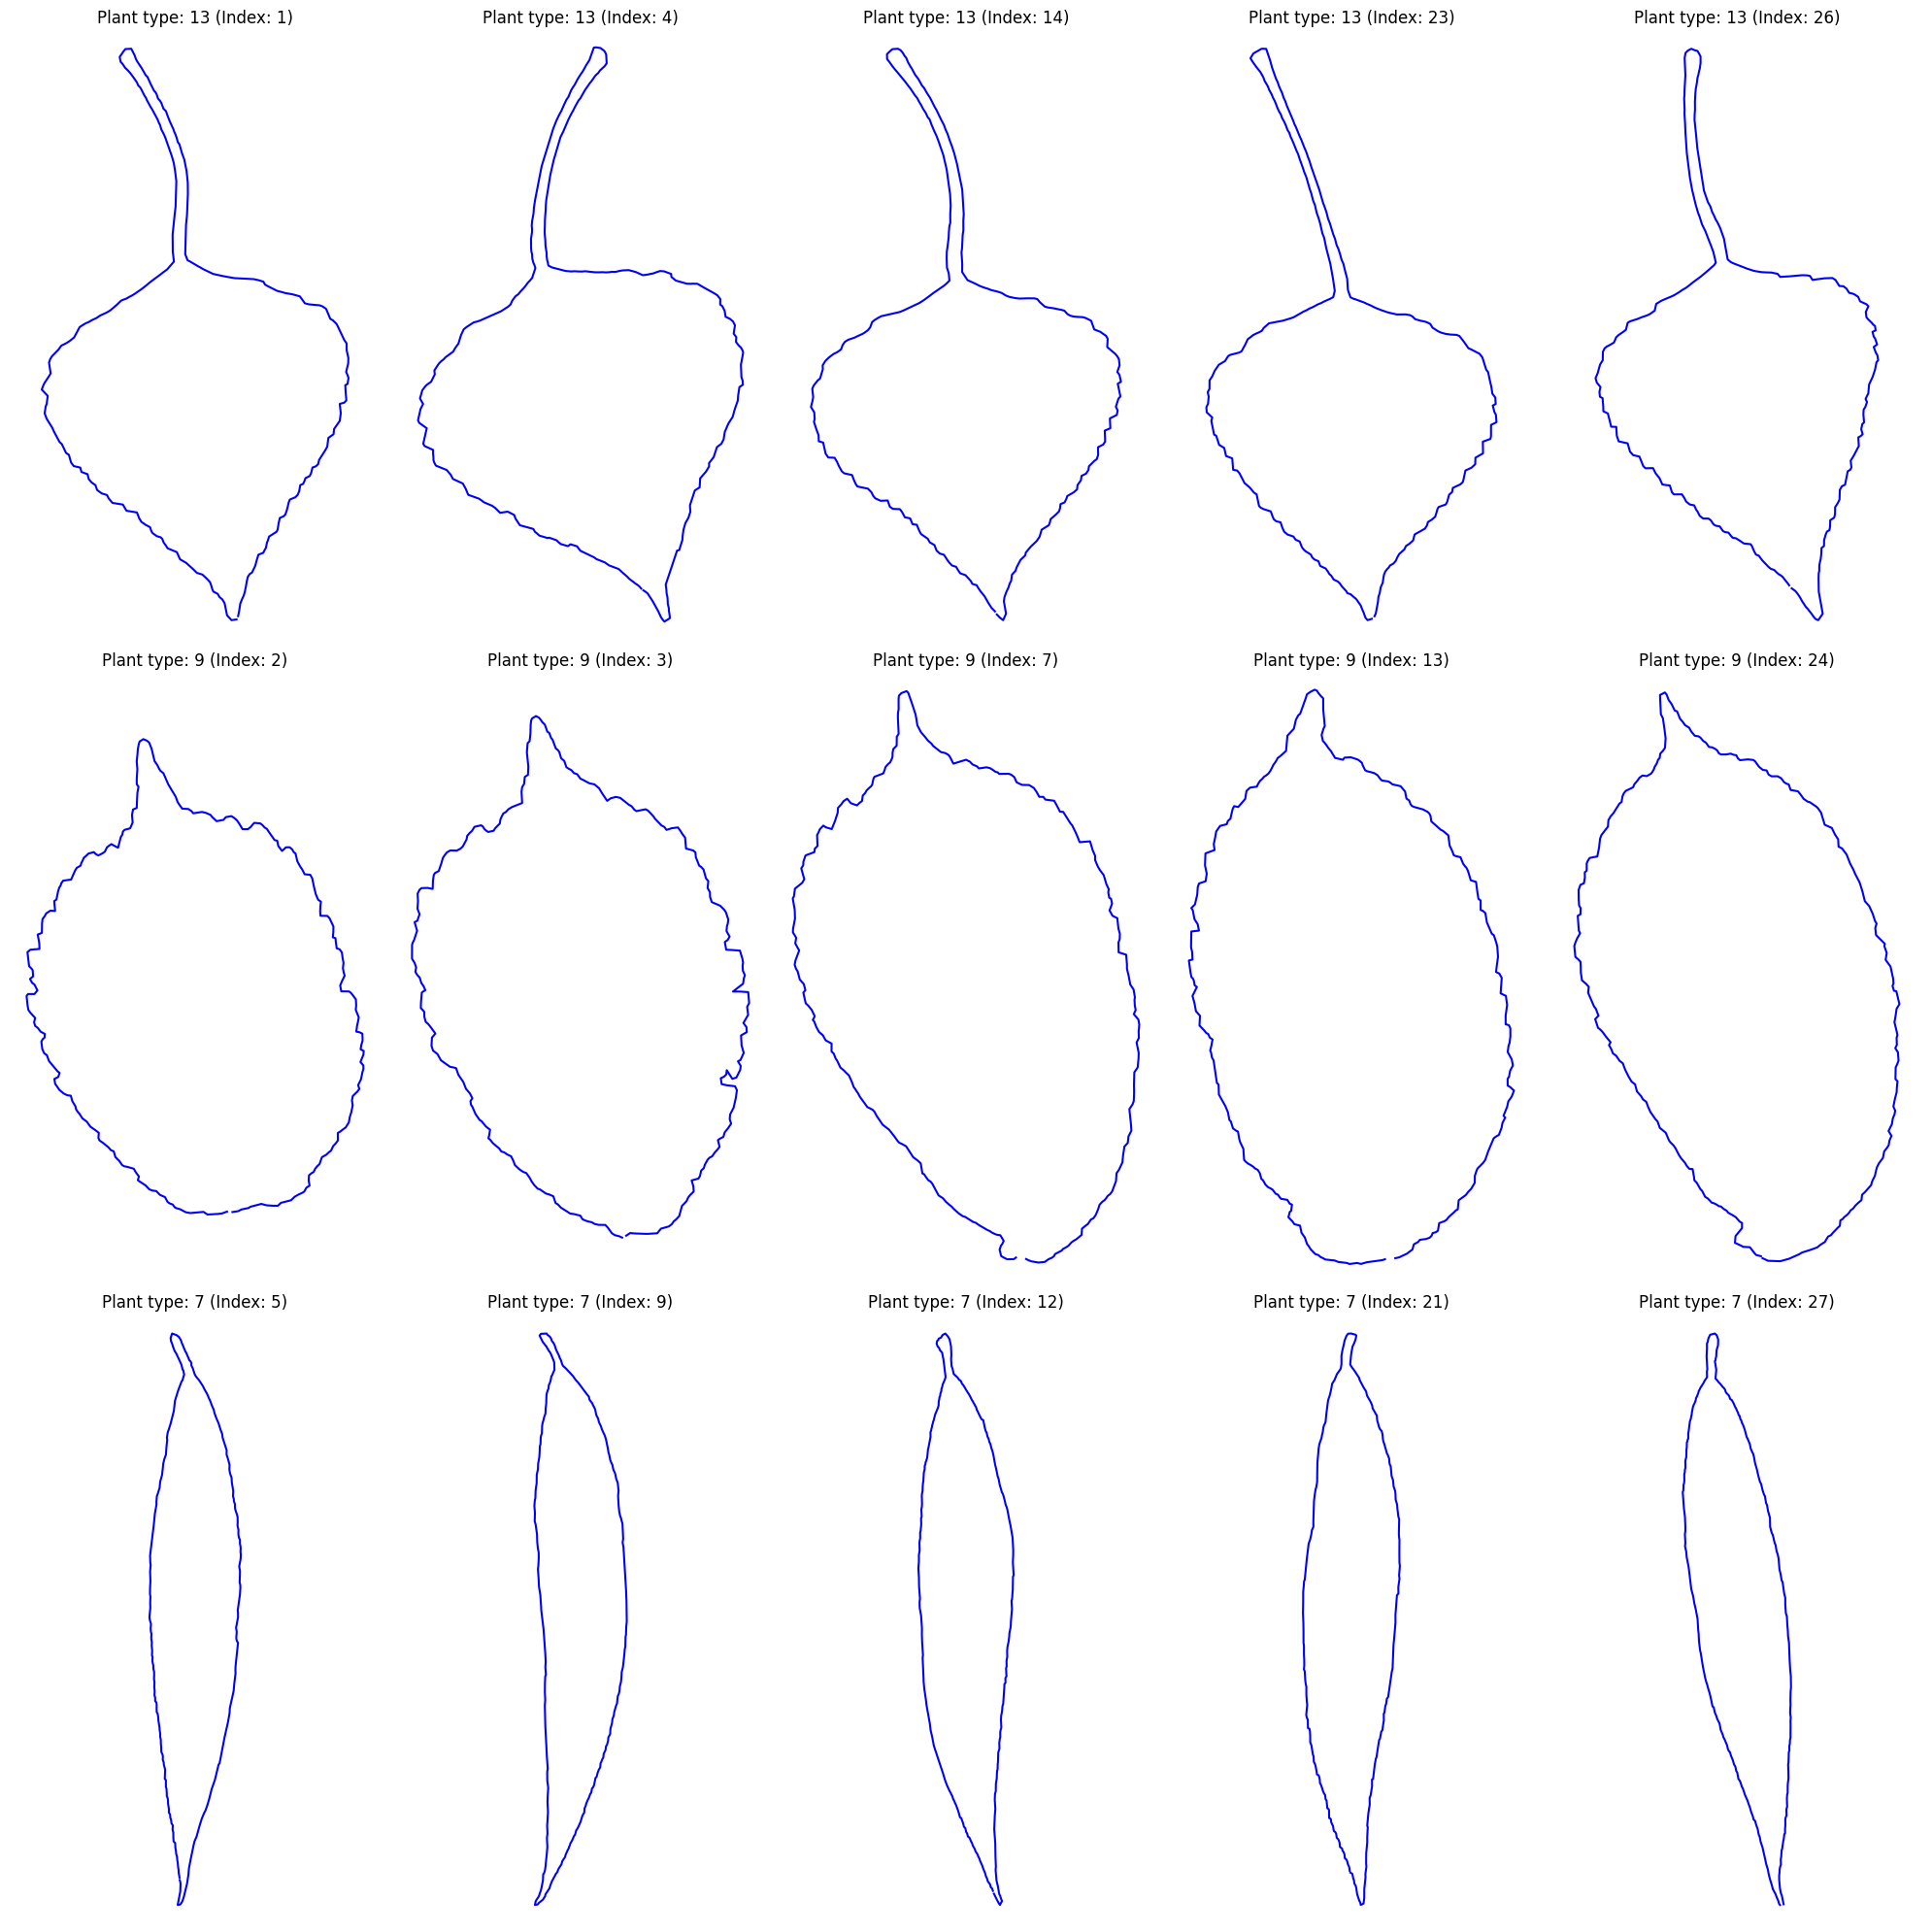

In [174]:
sub_fig = plot_sample_with_info(
    subset,
    # indexes=list(range(80, 100)),
    clean_subset,
    n_rows=3,
    n_cols=5,
    figsize=(20, 20),
)

In [57]:
CURVES_SPACE = DiscreteCurves(R2)
SRV_METRIC = CURVES_SPACE.srv_metric

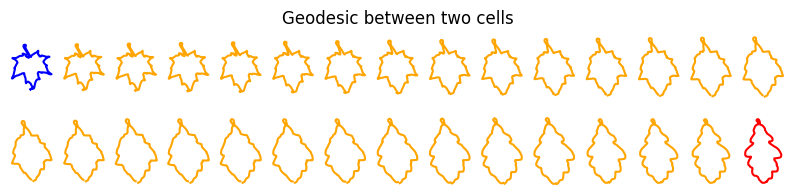

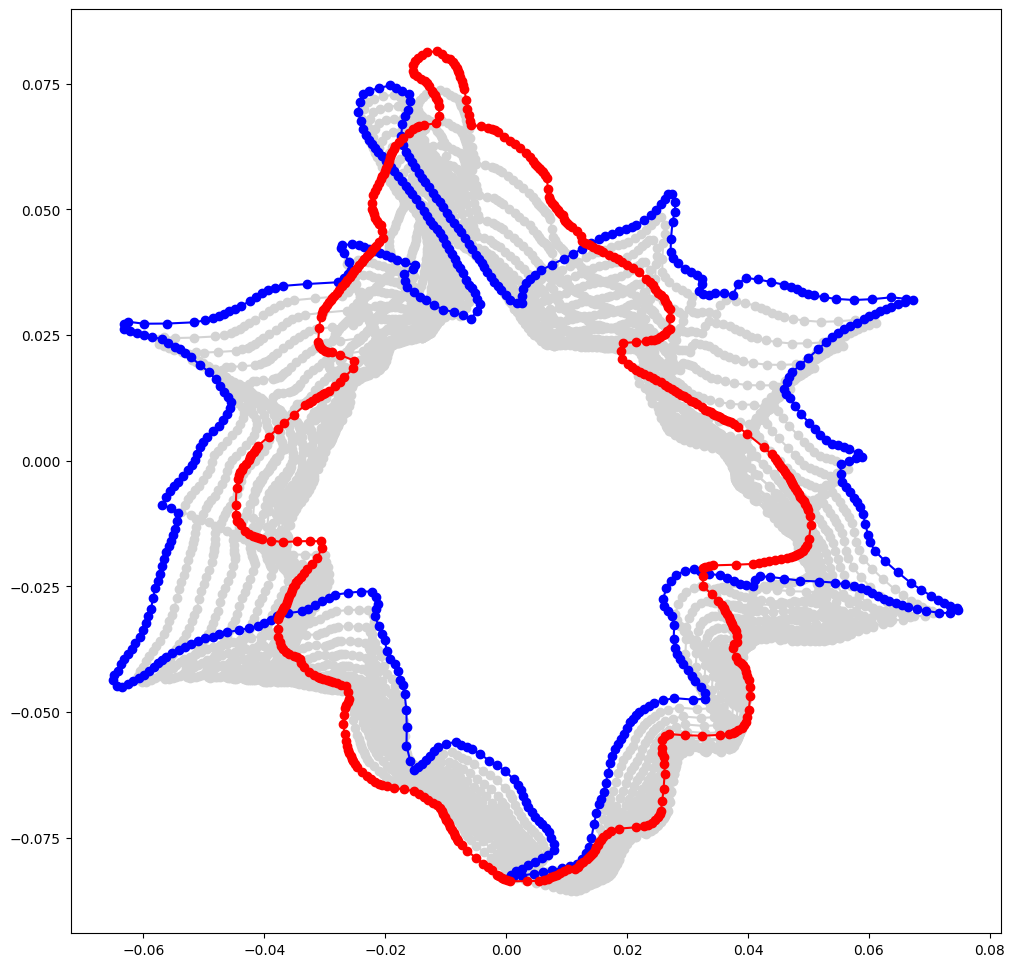

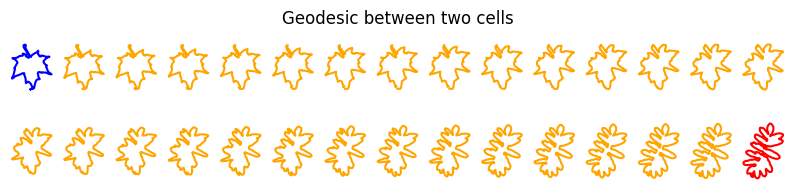

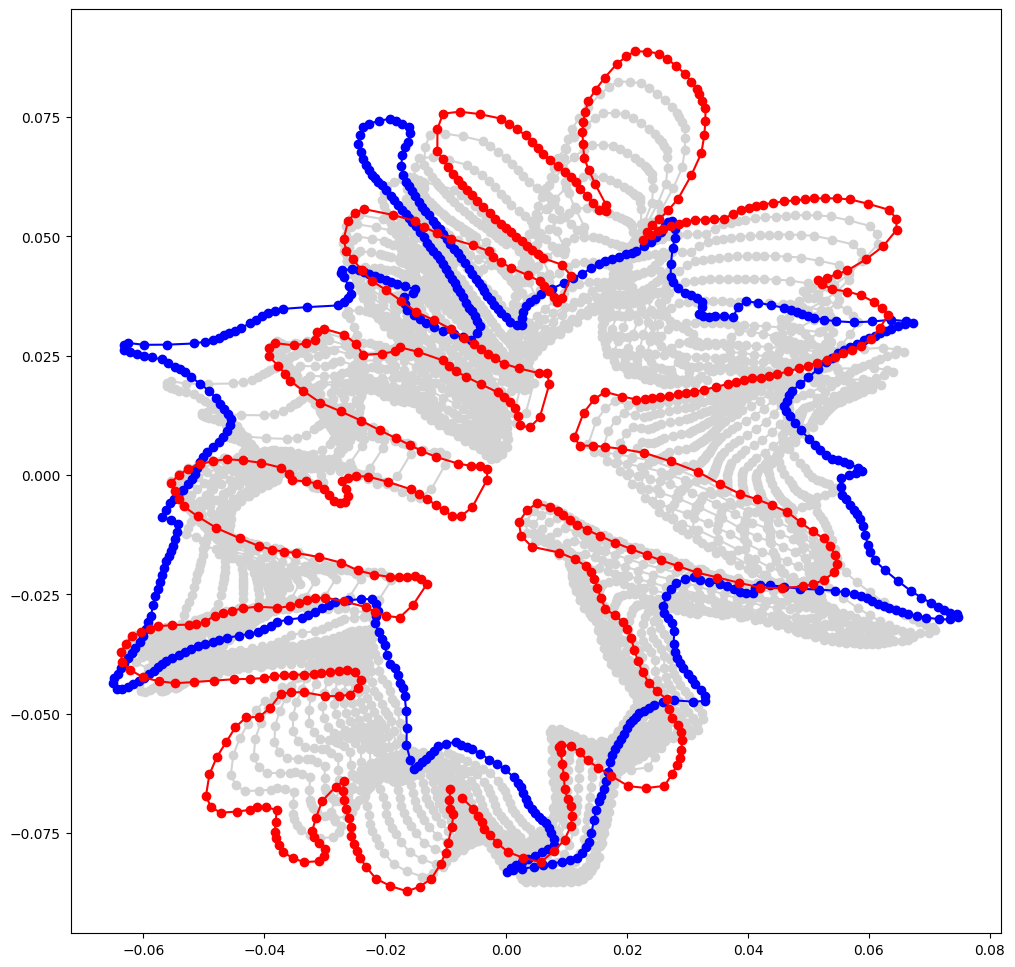

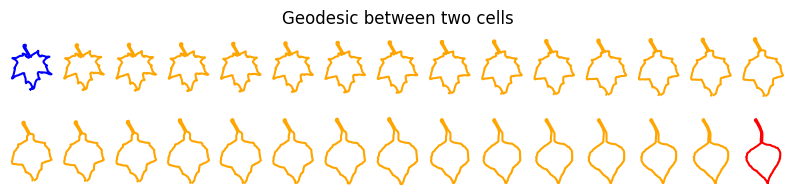

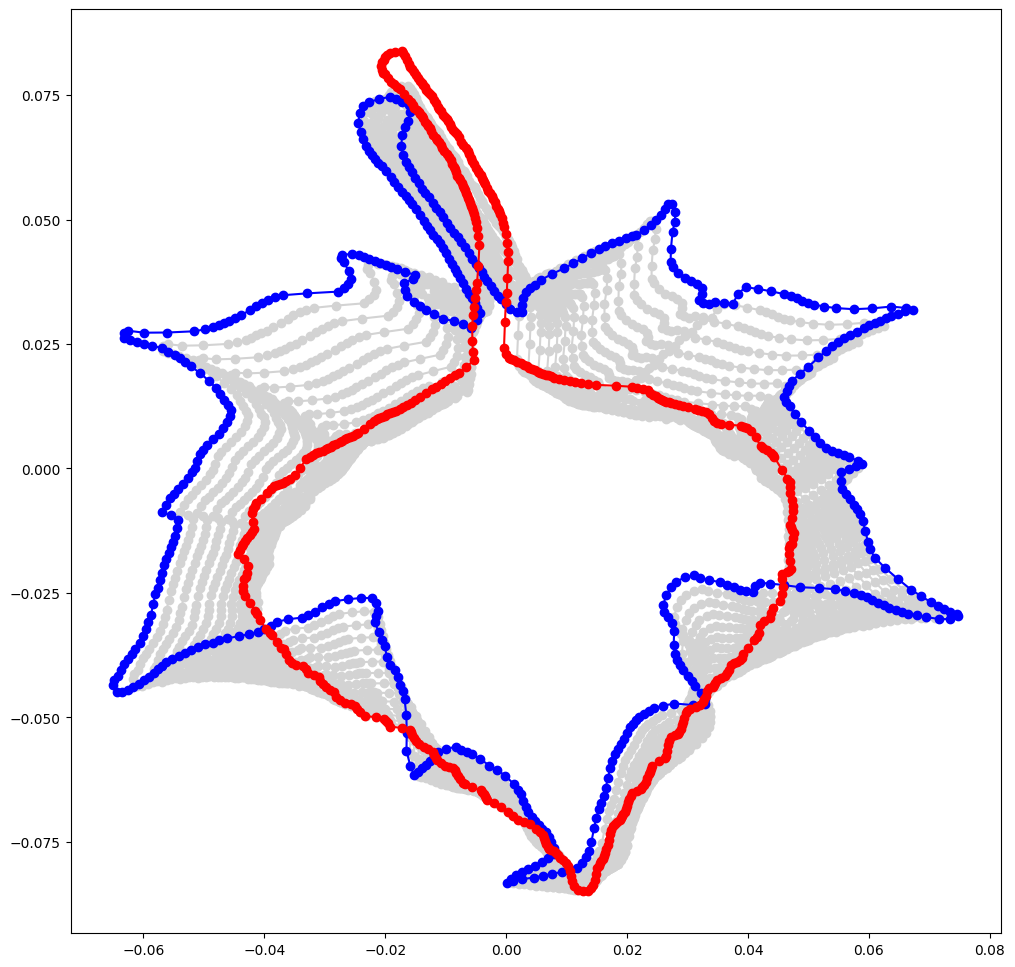

In [59]:
feuille_start = interpolate(train_ds_p[0]["curve"], 500)
ends = [6, 2, 5]

for end in ends:
    feuille_end = interpolate(train_ds_p[end]["curve"], 500)
    geodesic = SRV_METRIC.geodesic(initial_point=feuille_start, end_point=feuille_end)

    n_times = 30
    times = gs.linspace(0.0, 1.0, n_times)
    geod_points = geodesic(times)
    evol_fig = plots_geodesics(
        geod_points,
        out_files=[f"images/geodesic_{0}-{end}.svg", f"images/geodesic_{0}-{end}.png"],
    )
    overlayed_fig = plot_overlayed_geodesics(
        geod_points,
        out_files=[
            f"images/geodesic_overlayed_{0}-{end}.svg",
            f"images/geodesic_overlayed_{0}-{end}.png",
        ],
    )

In [175]:
leaf_shapes_list = []
labels = []
paths = []

for leaf_id in clean_subset:
    leaf = subset[leaf_id]
    leaf_shapes_list.append(interpolate(leaf["curve"], 300))
    labels.append(leaf["type"])
    paths.append(leaf["path"])

leaf_shapes = gs.array(leaf_shapes_list)
labels = gs.array(labels)
print(leaf_shapes.shape)

(15, 300, 2)


In [176]:
leaf_shapes_list = []
test_labels = []
test_paths = []

for leaf_id in test_subset:
    leaf = subset[leaf_id]
    leaf_shapes_list.append(interpolate(leaf["curve"], 300))
    test_labels.append(leaf["type"])
    test_paths.append(leaf["path"])

test_leaf_shapes = gs.array(leaf_shapes_list)
test_labels = gs.array(labels)
print(test_leaf_shapes.shape)

(6, 300, 2)


In [177]:
mean = FrechetMean(metric=SRV_METRIC, method="default")
median = GeometricMedian(metric=SRV_METRIC)

In [178]:
mean.fit(leaf_shapes)

FrechetMean(metric=<geomstats.geometry.discrete_curves.SRVMetric object at 0x000002C3B08F5E50>)

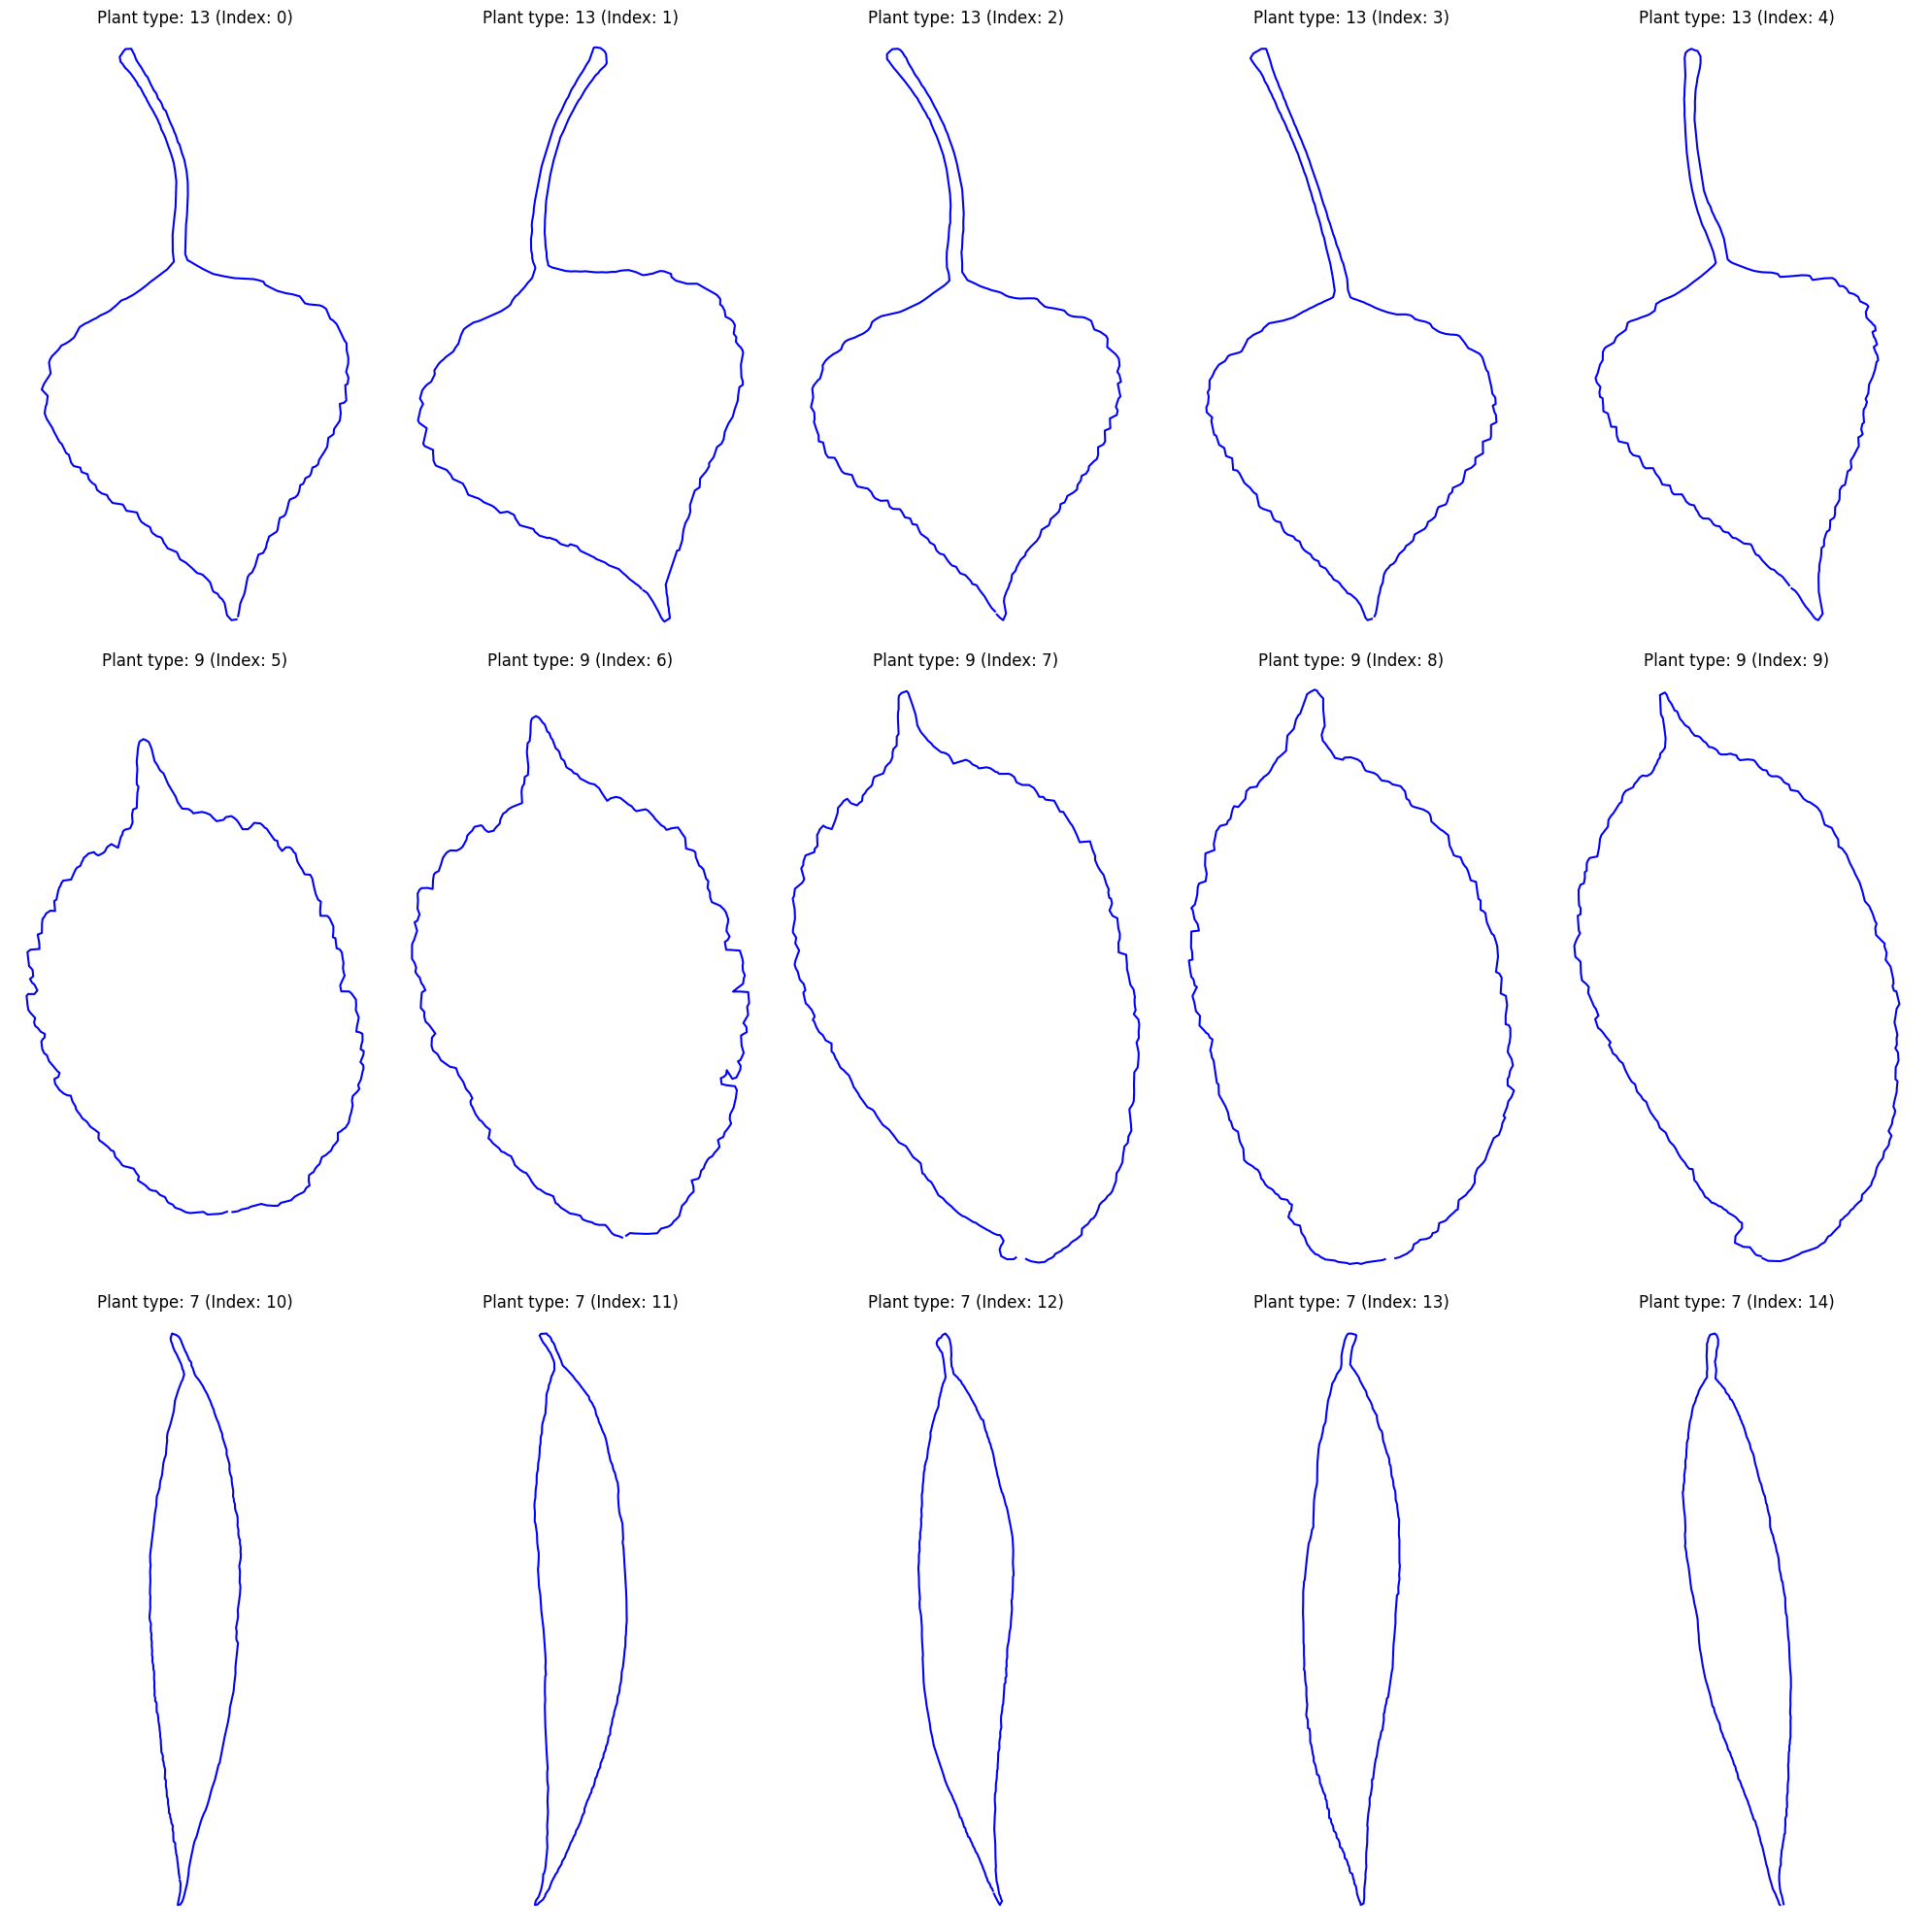

In [181]:
subset2 = [subset[i] for i in clean_subset]
labels2 = list(range(15))
sub_fig = plot_sample_with_info(
    subset2,
    indexes=labels2,
    # clean_subset,
    n_rows=3,
    n_cols=5,
    figsize=(20, 20),
)

In [182]:
mean.fit(leaf_shapes[:5])
mean_estimate1 = mean.estimate_
mean.fit(leaf_shapes[5:10])
mean_estimate2 = mean.estimate_
mean.fit(leaf_shapes[10:15])
mean_estimate3 = mean.estimate_
# mean.fit(leaf_shapes[15:20])
# mean_estimate4 = mean.estimate_

mean.fit(leaf_shapes)
mean_estimate5 = mean.estimate_

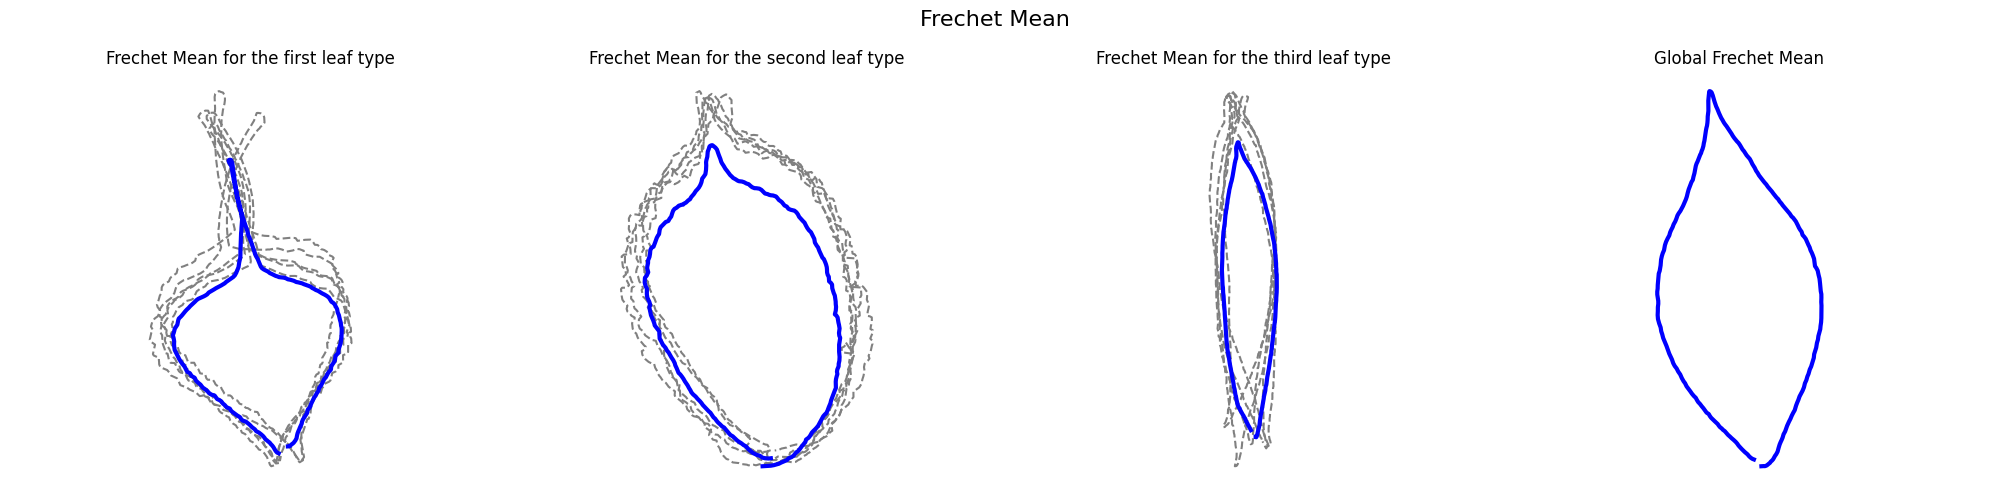

In [184]:
mean_fig, (ax1, ax2, ax3, ax5) = plt.subplots(1, 4, figsize=(20, 5))

for i in range(5):
    plot_curve(leaf_shapes[i], color="gray", ax=ax1, linestyle="--")
plot_curve(mean_estimate1, color="blue", ax=ax1, lw=3)
ax1.set(title="Frechet Mean for the first leaf type")

for i in range(5, 10):
    plot_curve(leaf_shapes[i], color="gray", ax=ax2, linestyle="--")
ax2 = plot_curve(mean_estimate2, color="blue", ax=ax2, lw=3)
ax2.set(title="Frechet Mean for the second leaf type")

for i in range(10, 15):
    plot_curve(leaf_shapes[i], color="gray", ax=ax3, linestyle="--")
ax3 = plot_curve(mean_estimate3, color="blue", ax=ax3, lw=3)
ax3.set(title="Frechet Mean for the third leaf type")

# for i in range(15, 20):
#     plot_curve(leaf_shapes[i], color='gray', ax=ax4, linestyle='--')
# ax4 = plot_curve(mean_estimate4, color='blue', ax=ax4, lw=3)
# ax4.set(title='Frechet Mean for the fourth leaf type')

ax5 = plot_curve(mean_estimate5, color="blue", ax=ax5, lw=3)
ax5.set(title="Global Frechet Mean")


mean_fig.suptitle("Frechet Mean", fontsize=16)
mean_fig.tight_layout()

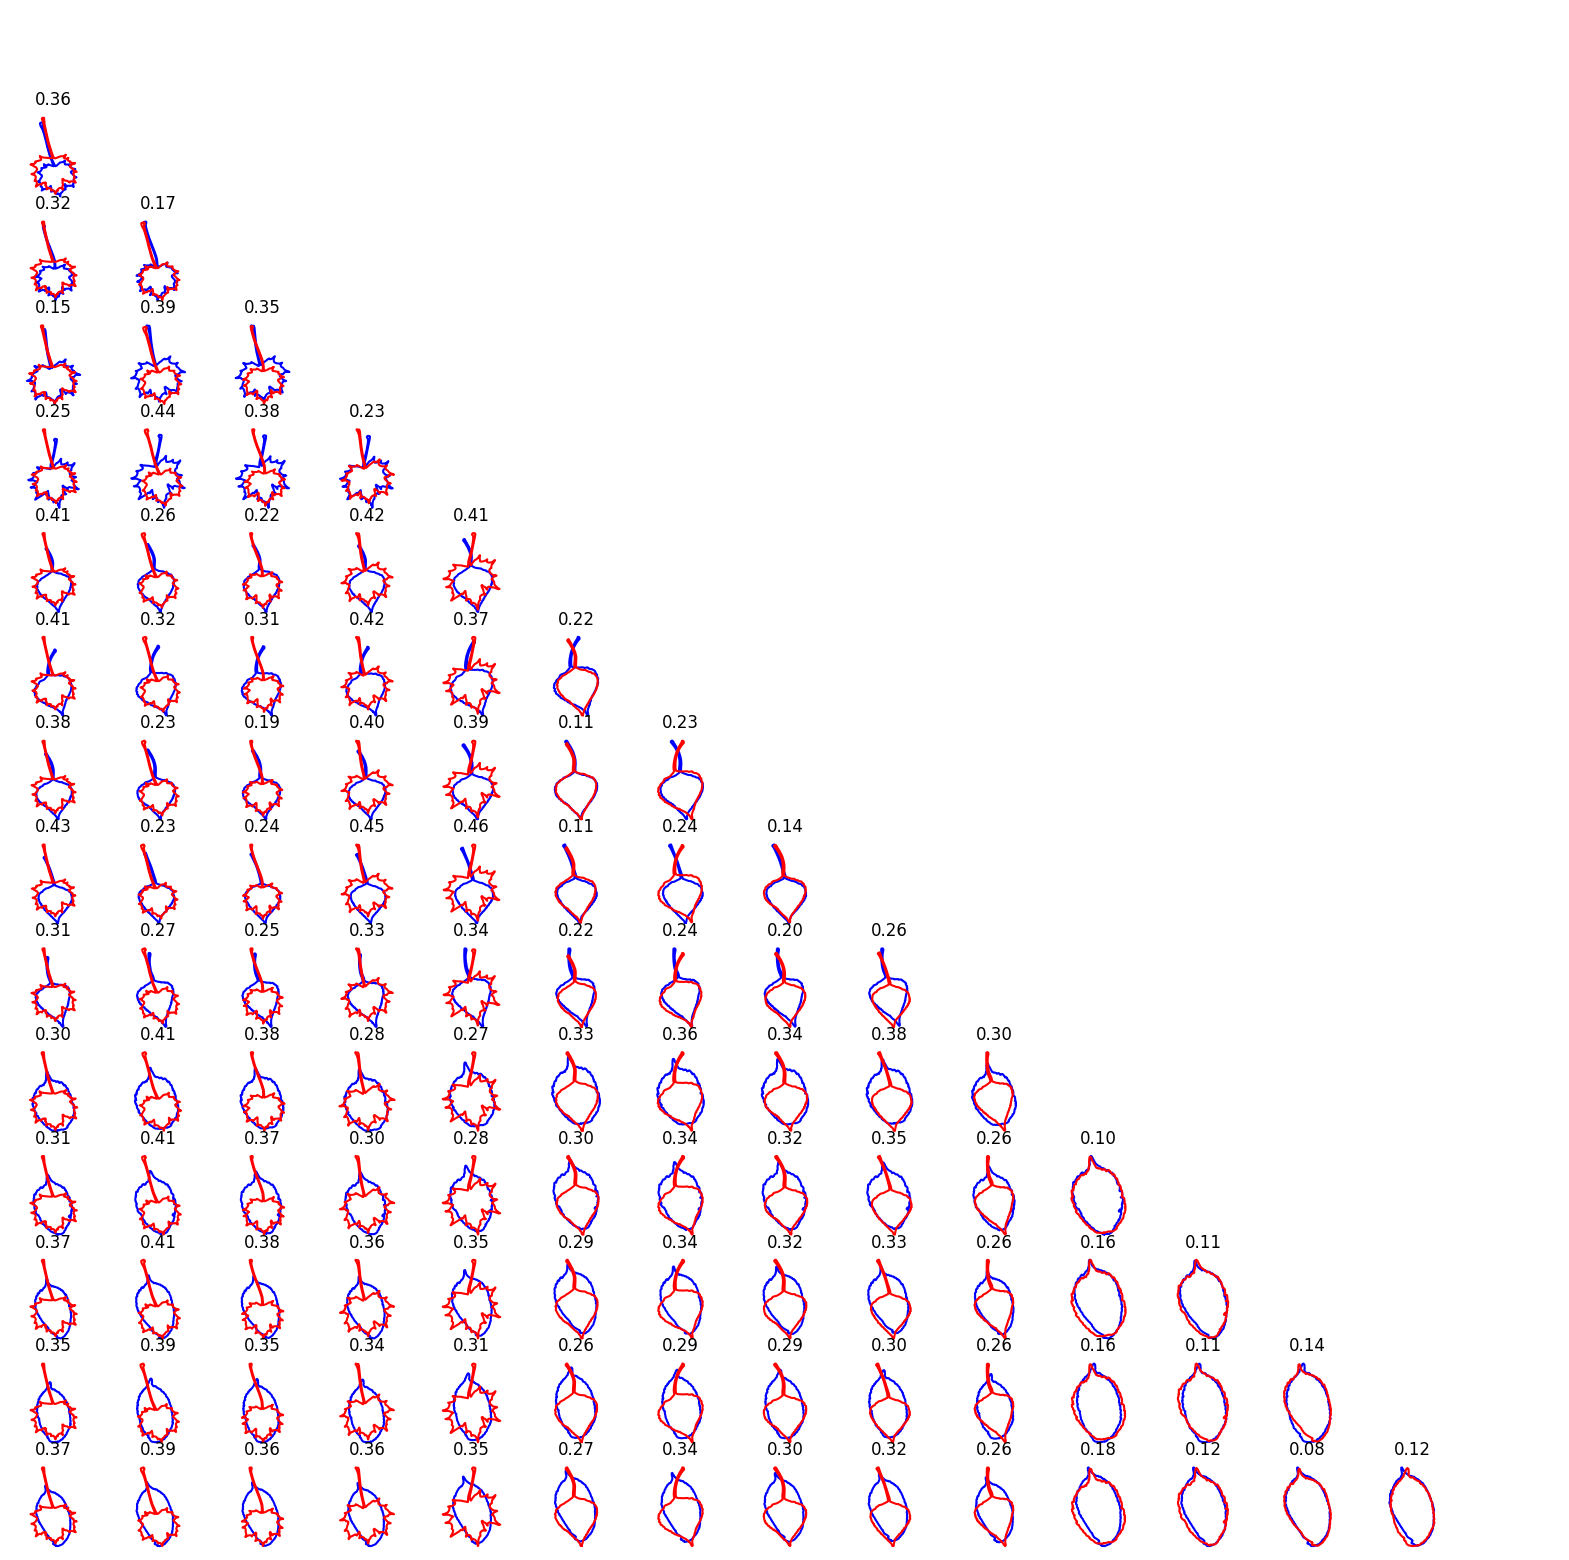

In [70]:
idx = list(range(15))
fig, axs = plt.subplots(len(idx), len(idx), figsize=(20, 20))
for i in range(len(idx)):
    for j in range(len(idx)):
        ax = axs[i, j]
        ax.axis("equal")
        ax.axis("off")
        if i > j:
            plot_curve(leaf_shapes[i], color="b", ax=ax)
            plot_curve(leaf_shapes[j], color="r", ax=ax)
            ax.set_title(f"{PRESHAPE_METRIC.dist(leaf_shapes[i], leaf_shapes[j]):.2f}")

In [185]:
dists_matrix = SRV_METRIC.dist_pairwise(leaf_shapes)

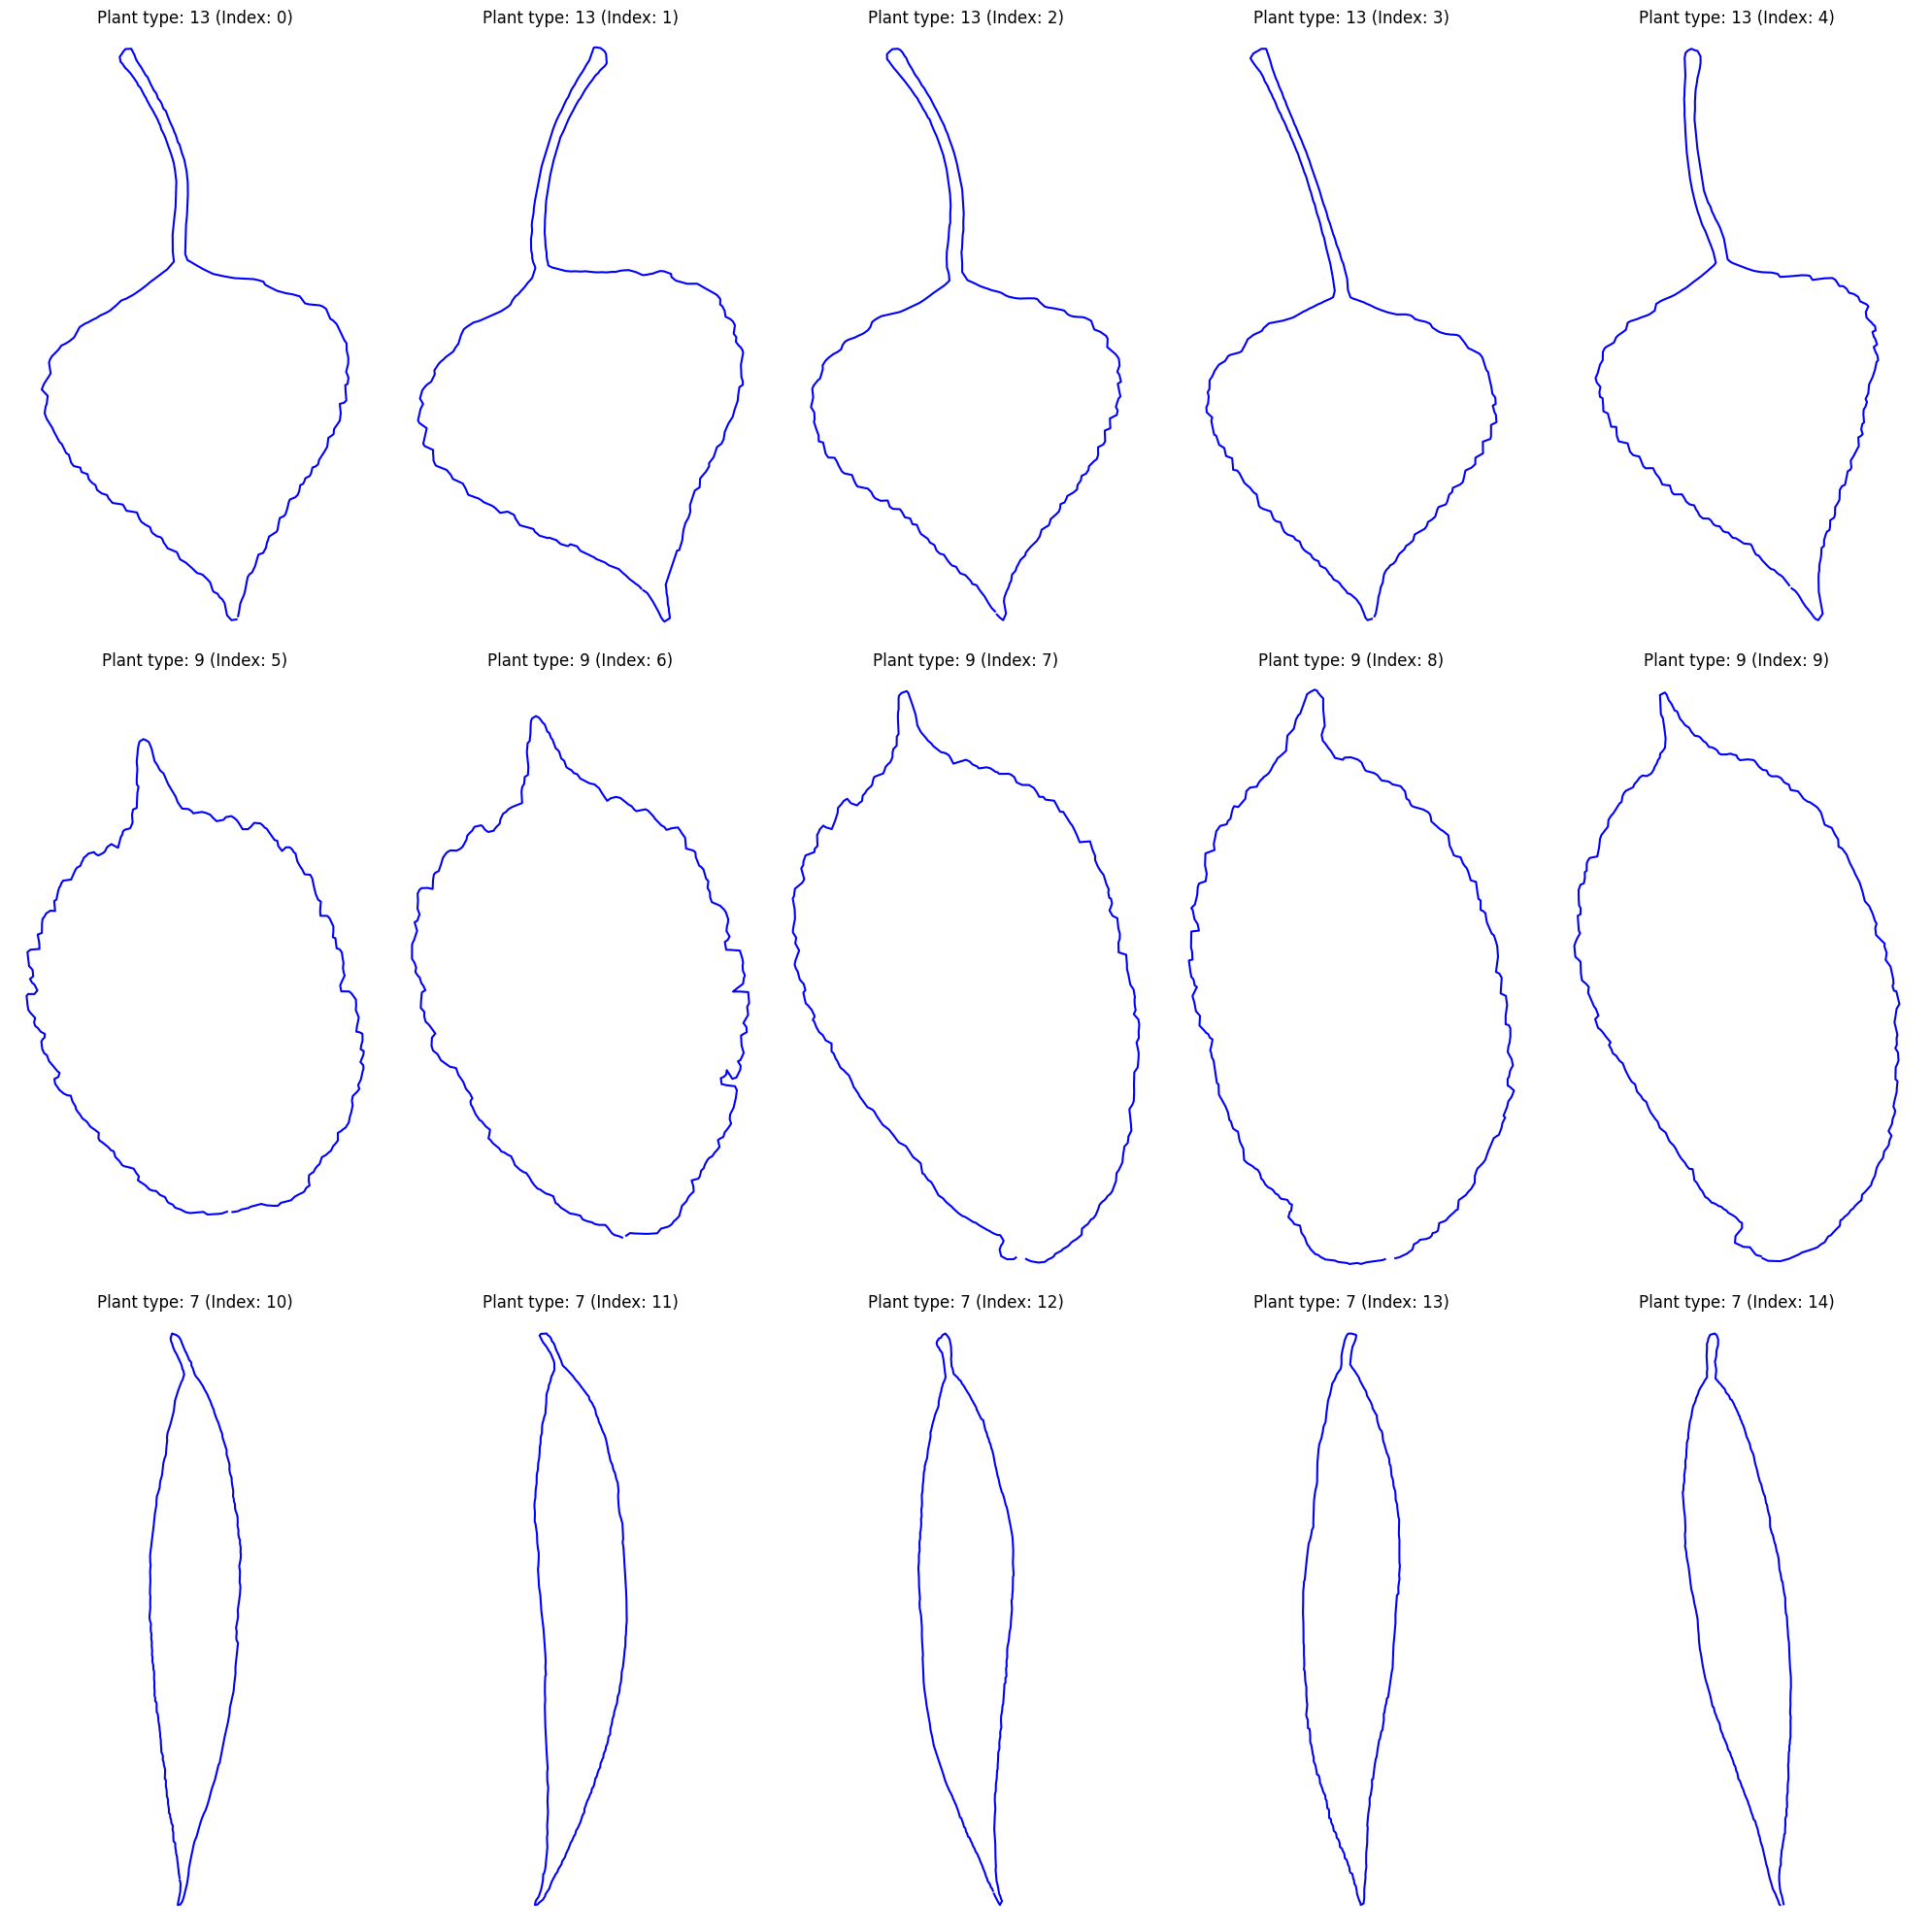

In [186]:
sub_fig = plot_sample_with_info(
    subset2,
    indexes=labels2,
    # clean_subset,
    n_rows=3,
    n_cols=5,
    figsize=(20, 20),
)

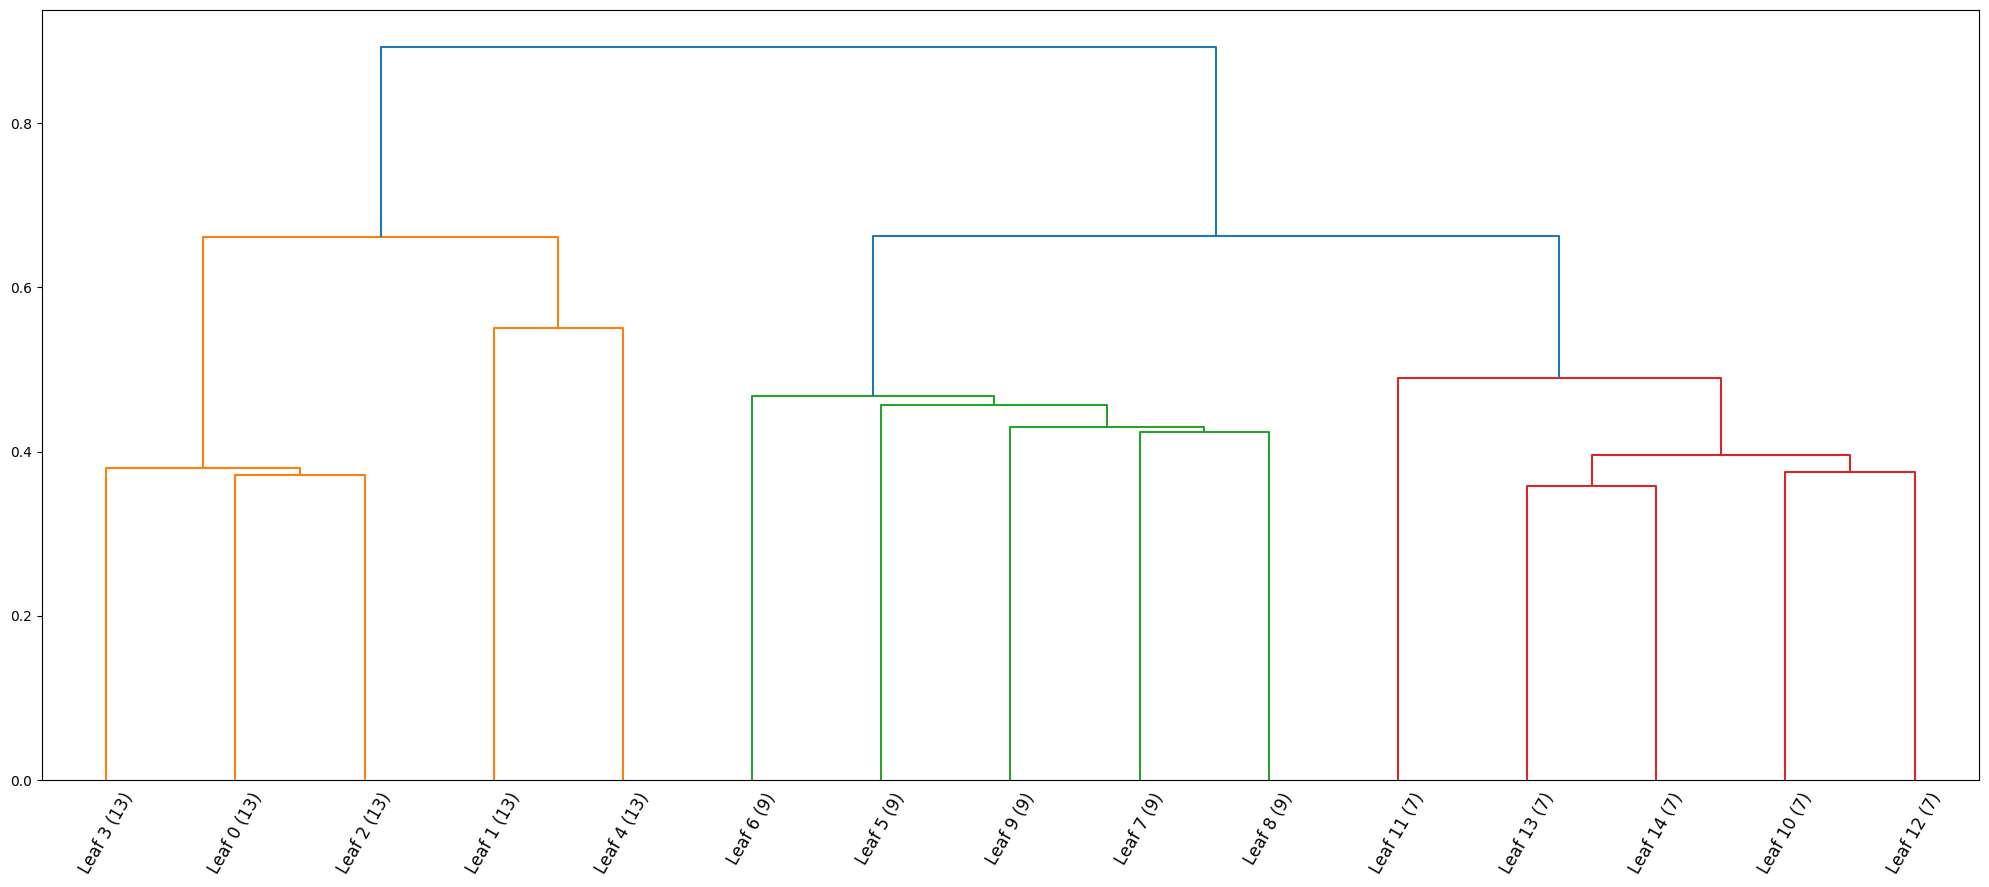

In [254]:
Z = linkage(squareform(dists_matrix), method="ward")
fig = plt.figure(figsize=(25, 10))

den_labels = [f"Leaf {i} ({labels[i]})" for i in labels2]

dn = dendrogram(
    Z, labels=den_labels, distance_sort=True, leaf_rotation=60, color_threshold=0.662
)

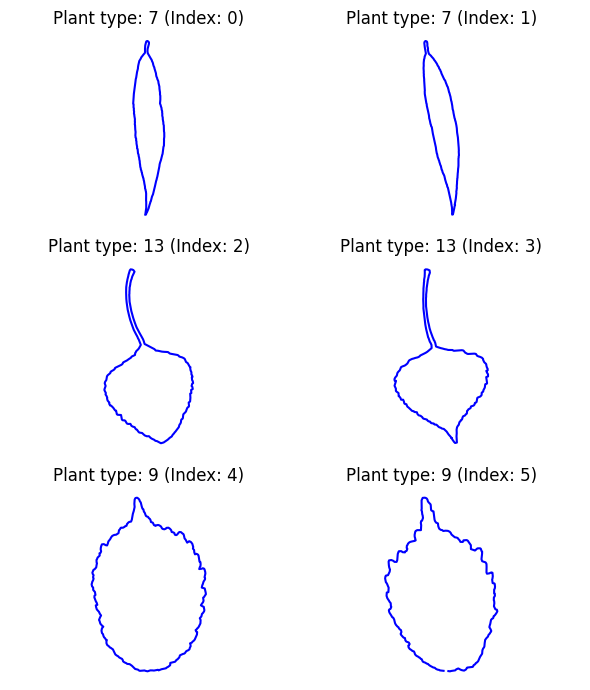

In [194]:
subset3 = [subset[i] for i in test_subset]
labels3 = list(range(len(test_subset)))
sub_fig = plot_sample_with_info(
    subset3,
    indexes=labels3,
    # clean_subset,
    n_rows=3,
    n_cols=2,
    figsize=(6, 7),
)

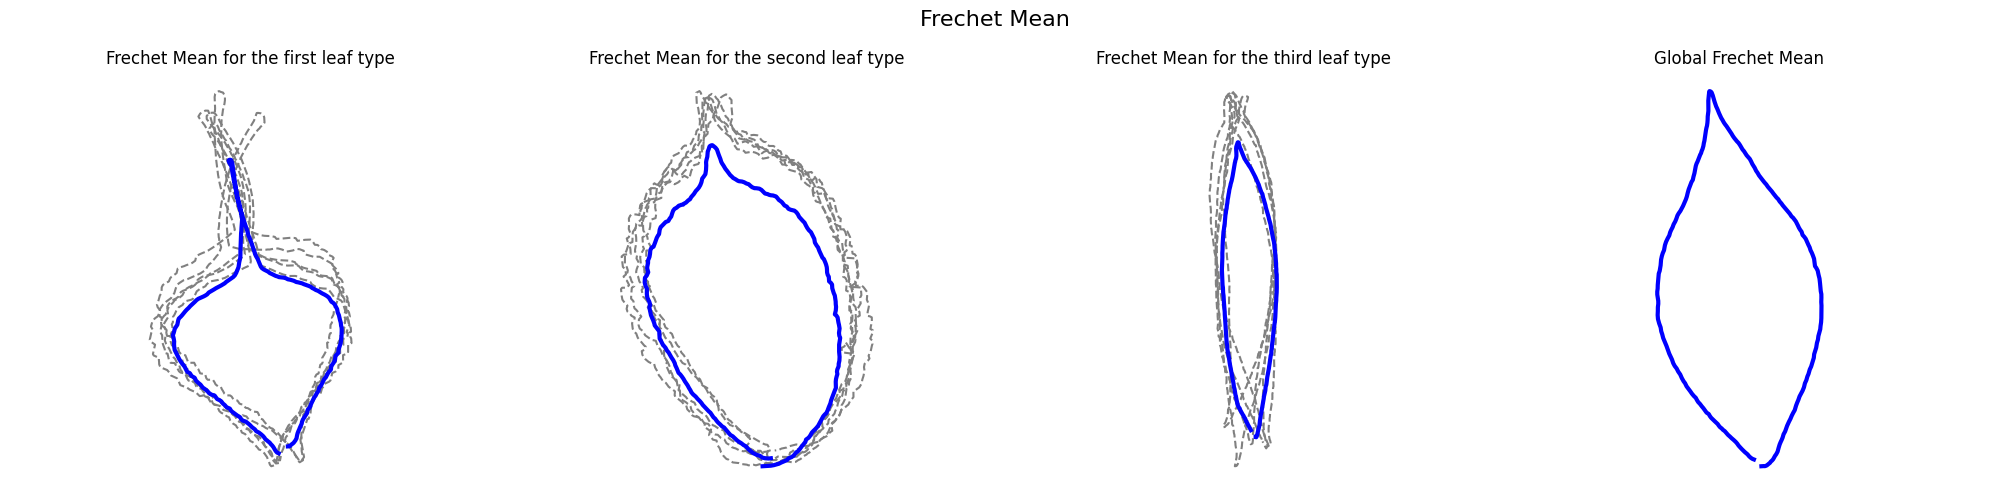

In [195]:
mean_fig

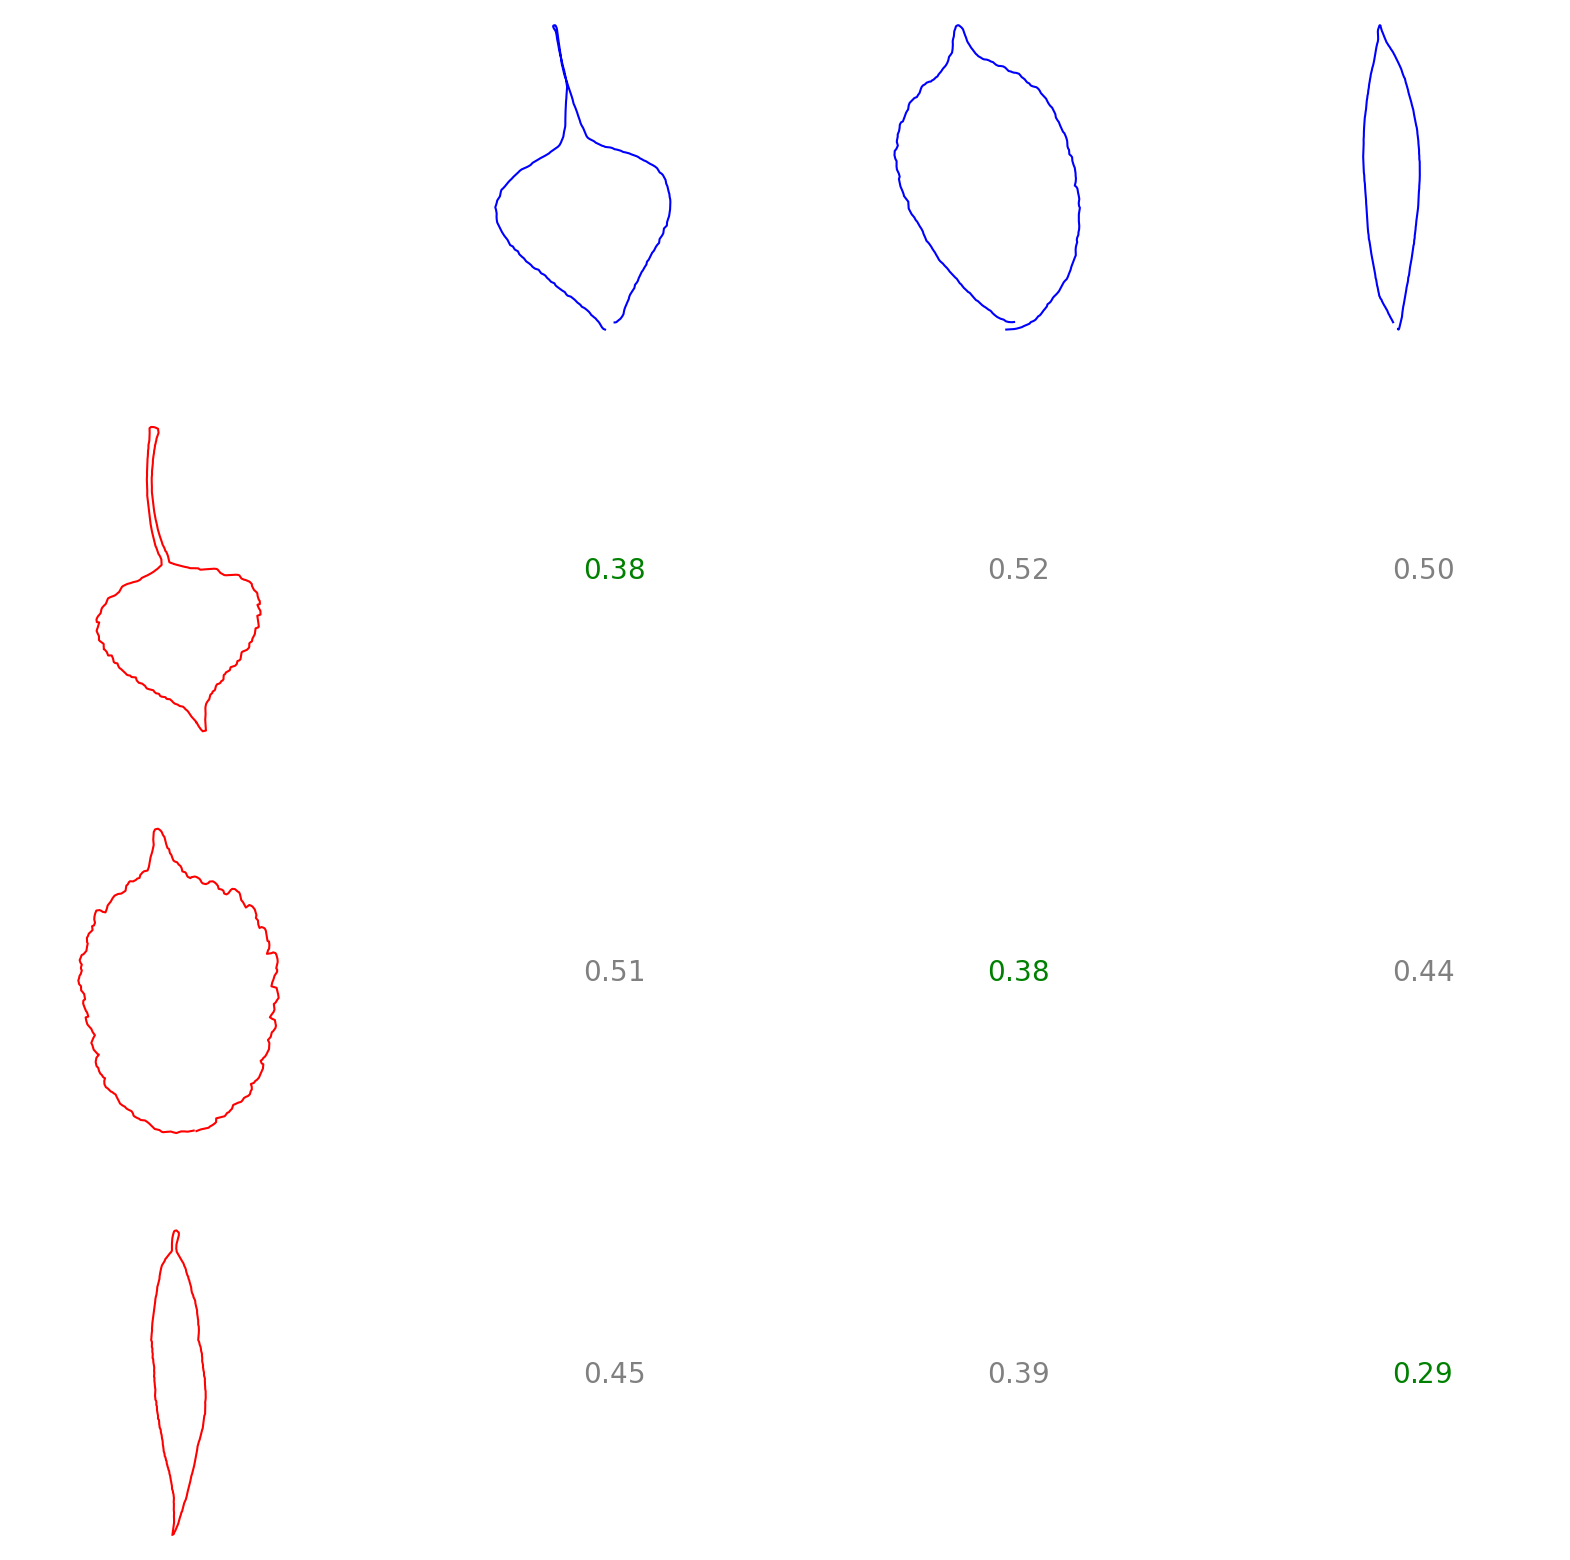

In [203]:
means = [mean_estimate1, mean_estimate2, mean_estimate3, mean_estimate5]
tests = [test_leaf_shapes[3], test_leaf_shapes[4], test_leaf_shapes[0]]

dist_to_mean_fig, axs = plt.subplots(4, 4, figsize=(20, 20))
axs[0, 0].axis("off")
axs[0, 0].axis("equal")

plot_curve(mean_estimate1, color="blue", ax=axs[0, 1])
plot_curve(mean_estimate2, color="blue", ax=axs[0, 2])
plot_curve(mean_estimate3, color="blue", ax=axs[0, 3])
# plot_curve(mean_estimate4, color='blue', ax=axs[0, 4])
# plot_curve(mean_estimate5, color='blue', ax=axs[0, 5])

plot_curve(tests[0], color="red", ax=axs[1, 0])
plot_curve(tests[1], color="red", ax=axs[2, 0])
plot_curve(tests[2], color="red", ax=axs[3, 0])
# plot_curve(tests[3], color='red', ax=axs[4, 0])

for i in range(1, 4):
    for j in range(1, 4):
        axs[i, j].axis("off")
        axs[i, j].axis("equal")
        if i == j:
            axs[i, j].text(
                0,
                0,
                rf"${SRV_METRIC.dist(tests[i-1], means[j-1]):.2f}$",
                fontsize=20,
                color="green",
            )
        else:
            axs[i, j].text(
                0,
                0,
                rf"${SRV_METRIC.dist(tests[i-1], means[j-1]):.2f}$",
                fontsize=20,
                color="gray",
            )